<a href="https://colab.research.google.com/github/otwn/Data-Science-Review/blob/master/Support_Vector_Machines.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Machines

Support Vector Machines are one of the best machine learning methods when **getting the correct answer is a higher priorty than understanding why** you get the correct answer, and they work really well with relatively small datasets.

- **Importing the Data From a File**

- **Missing Data**
    - Identifying Missing Data
    - Dealing with Missing Data
    

- **Formatting the Data for Support Vector Machines**
    - Split data into Dependent and Independent Variables
    - One-Hot-Encoding
    - Centering and Scaling the Data
    

- **Building a Preliminary Support Vector Machine**

- **Opimizing Parameters with Cross Validation**
    - Cross Validation For Finding the Best Values for Gamma and Regularization


- **Building, Evaluating, Drawing and Interpreting the Final Support Vector Machine**

## Import the modules

In [1]:
import pandas as pd # pandas is used to load and manipulate data and for One-Hot Encoding
import numpy as np # numpy is used to calculate the mean and standard deviation
import matplotlib.pyplot as plt # matplotlib is for drawing graphs
import matplotlib.colors as colors
from sklearn.model_selection import train_test_split # split  data into training and testing sets
from sklearn.preprocessing import scale # scale and center data
from sklearn.svm import SVC # this will make a support vector machine for classificaiton
from sklearn.model_selection import GridSearchCV # this will do cross validation
from sklearn.metrics import confusion_matrix # this creates a confusion matrix
from sklearn.metrics import plot_confusion_matrix # draws a confusion matrix
from sklearn.decomposition import PCA # to perform PCA to plot the data

## Import the data

a dataset from the **[UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/index.php)**.
Specifically, we are going to use the **[Heart Disease Dataset](https://archive.ics.uci.edu/ml/datasets/Heart+Disease)**. This dataset will allow us to predict if someone has heart disease based on their sex, age, blood pressure and a variety of other metrics.

In [47]:
df = pd.read_csv('https://raw.githubusercontent.com/otwn/Data-Science-Review/master/data/processed.cleveland.data', header=None)

In [48]:
df.head()

0    1    2      3      4    5    6      7    8    9    10   11   12  13
0  63.0  1.0  1.0  145.0  233.0  1.0  2.0  150.0  0.0  2.3  3.0  0.0  6.0   0
1  67.0  1.0  4.0  160.0  286.0  0.0  2.0  108.0  1.0  1.5  2.0  3.0  3.0   2
2  67.0  1.0  4.0  120.0  229.0  0.0  2.0  129.0  1.0  2.6  2.0  2.0  7.0   1
3  37.0  1.0  3.0  130.0  250.0  0.0  0.0  187.0  0.0  3.5  3.0  0.0  3.0   0
4  41.0  0.0  2.0  130.0  204.0  0.0  2.0  172.0  0.0  1.4  1.0  0.0  3.0   0

There is no header (no column names). Replace the column numbers with the following column names

- **age**,
- **sex**,
- **cp**, chest pain
- **restbp**, resting blood pressure (in mm Hg)
- **chol**, serum cholesterol in mg/dl
- **fbs**, fasting blood sugar
- **restecg**, resting electrocardiographic results
- **thalach**,  maximum heart rate achieved
- **exang**, exercise induced angina
- **oldpeak**, ST depression induced by exercise relative to rest
- **slope**, the slope of the peak exercise ST segment.
- **ca**, number of major vessels (0-3) colored by fluoroscopy
- **thal**, this is short of thalium heart scan.
- **hd**, diagnosis of heart disease, the predicted attribute

In [49]:
df.columns = ['age',
              'sex',
              'cp',
              'restbp',
              'chol',
              'fbs',
              'restecg',
              'thalach',
              'exang',
              'oldpeak',
              'slope',
              'ca',
              'thal',
              'hd']
df.head()

age  sex   cp  restbp   chol  fbs  ...  exang  oldpeak  slope   ca  thal hd
0  63.0  1.0  1.0   145.0  233.0  1.0  ...    0.0      2.3    3.0  0.0   6.0  0
1  67.0  1.0  4.0   160.0  286.0  0.0  ...    1.0      1.5    2.0  3.0   3.0  2
2  67.0  1.0  4.0   120.0  229.0  0.0  ...    1.0      2.6    2.0  2.0   7.0  1
3  37.0  1.0  3.0   130.0  250.0  0.0  ...    0.0      3.5    3.0  0.0   3.0  0
4  41.0  0.0  2.0   130.0  204.0  0.0  ...    0.0      1.4    1.0  0.0   3.0  0

[5 rows x 14 columns]

## Identify and Dealing with Missing Data

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


The fact that the **ca** and **thal** columns have `object` data types suggests there is something funny going on in them. `object` datatypes are used when there are mixtures of things, like a mixture of numbers and letters. In theory, both **ca** and **thal** should just have a few values representing different categories, so let's investigate what's going on by printing out their unique values.

In [51]:
df['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0', '?'], dtype=object)

**ca** contains numbers and questions marks. The numbers represent the number of blood vessels that we lit up by fluoroscopy and the question marks represent missing data

In [52]:
df['thal'].unique()

array(['6.0', '3.0', '7.0', '?'], dtype=object)

**thal** also contains a mixture of numbers, representing the different diagnoses from the thalium heart scan, and question marks, which represent missing values. 

In [53]:
len(df.loc[(df['ca'] == '?')])

4

In [54]:
len(df.loc[ (df['ca'] == '?') | (df['thal'] == '?') ])

6

In [55]:
df.loc[ (df['ca'] == '?') | (df['thal'] == '?') ]

age  sex   cp  restbp   chol  fbs  ...  exang  oldpeak  slope   ca  thal hd
87   53.0  0.0  3.0   128.0  216.0  0.0  ...    0.0      0.0    1.0  0.0     ?  0
166  52.0  1.0  3.0   138.0  223.0  0.0  ...    0.0      0.0    1.0    ?   3.0  0
192  43.0  1.0  4.0   132.0  247.0  1.0  ...    1.0      0.1    2.0    ?   7.0  1
266  52.0  1.0  4.0   128.0  204.0  1.0  ...    1.0      1.0    2.0  0.0     ?  2
287  58.0  1.0  2.0   125.0  220.0  0.0  ...    0.0      0.4    2.0    ?   7.0  0
302  38.0  1.0  3.0   138.0  175.0  0.0  ...    0.0      0.0    1.0    ?   3.0  0

[6 rows x 14 columns]

6 of the **303** rows, or **2%**, contain missing values. Since **303 - 6 = 297**, and **297** is plenty of data to build a support vector machine, we will remove the rows with missing values, rather than try to impute their values. We do this by selecting all of the rows that do not contain question marks in either the **ca** or **thal** columns:

In [56]:
df_no_missing = df.loc[ (df['ca'] != '?') & (df['thal'] != '?') ]

In [57]:
len(df_no_missing)

297

In [58]:
df_no_missing['ca'].unique()

array(['0.0', '3.0', '2.0', '1.0'], dtype=object)

In [59]:
df_no_missing['thal'].unique()

array(['6.0', '3.0', '7.0'], dtype=object)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      303 non-null    float64
 1   sex      303 non-null    float64
 2   cp       303 non-null    float64
 3   restbp   303 non-null    float64
 4   chol     303 non-null    float64
 5   fbs      303 non-null    float64
 6   restecg  303 non-null    float64
 7   thalach  303 non-null    float64
 8   exang    303 non-null    float64
 9   oldpeak  303 non-null    float64
 10  slope    303 non-null    float64
 11  ca       303 non-null    object 
 12  thal     303 non-null    object 
 13  hd       303 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 33.3+ KB


In [61]:
df_no_missing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 297 entries, 0 to 301
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   age      297 non-null    float64
 1   sex      297 non-null    float64
 2   cp       297 non-null    float64
 3   restbp   297 non-null    float64
 4   chol     297 non-null    float64
 5   fbs      297 non-null    float64
 6   restecg  297 non-null    float64
 7   thalach  297 non-null    float64
 8   exang    297 non-null    float64
 9   oldpeak  297 non-null    float64
 10  slope    297 non-null    float64
 11  ca       297 non-null    object 
 12  thal     297 non-null    object 
 13  hd       297 non-null    int64  
dtypes: float64(11), int64(1), object(2)
memory usage: 34.8+ KB


## Split the Data into Dependent and Independent Variables

The first step is to split the data into two parts:
1. The columns of data that we will use to make classifications
2. The column of data that we want to predict.

`X` (capital **X**) to represent the columns of data that we will use to make classifications and `y` (lower case **y**) to represent the thing we want to predict. In this case, we want to predict **hd** (heart disease).


In [62]:
X = df_no_missing.drop('hd', axis=1).copy() 

In [63]:
X.head()

age  sex   cp  restbp   chol  fbs  ...  thalach  exang  oldpeak  slope   ca thal
0  63.0  1.0  1.0   145.0  233.0  1.0  ...    150.0    0.0      2.3    3.0  0.0  6.0
1  67.0  1.0  4.0   160.0  286.0  0.0  ...    108.0    1.0      1.5    2.0  3.0  3.0
2  67.0  1.0  4.0   120.0  229.0  0.0  ...    129.0    1.0      2.6    2.0  2.0  7.0
3  37.0  1.0  3.0   130.0  250.0  0.0  ...    187.0    0.0      3.5    3.0  0.0  3.0
4  41.0  0.0  2.0   130.0  204.0  0.0  ...    172.0    0.0      1.4    1.0  0.0  3.0

[5 rows x 13 columns]

In [64]:
y = df_no_missing['hd'].copy()
y.head()

0    0
1    2
2    1
3    0
4    0
Name: hd, dtype: int64

<a id="one-hot-encoding"></a>
## One-Hot Encoding

`X`, which contains the data we will use to make, or predict, classifications, and `y`, which contains the known classifications in our training dataset, we need to take a closer look at the variables in `X`. The list bellow tells us what each variable represents and the type of data (**float** or **categorical**) it should contain:

- **age**, **Float**
- **sex** - **Category**
  - 0 = female
  - 1 = male
- **cp**, chest pain, **Category**
  - 1 = typical angina,
  - 2 = atypical angina,
  - 3 = non-anginal pain,
  - 4 = asymptomatic
- **restbp**, resting blood pressure (in mm Hg), **Float**
- **chol**, serum cholesterol in mg/dl, **Float**
- **fbs**, fasting blood sugar, **Category**
  - 0 = >=120 mg/dl
  - 1 = <120 mg/dl
- **restecg**, resting electrocardiographic results, **Category**
  - 1 = normal
  - 2 = having ST-T wave abnormality
  - 3 = showing probable or definite left ventricular hypertrophy
- **thalach**,  maximum heart rate achieved, **Float**
- **exang**, exercise induced angina, **Category**
  - 0 = no
  - 1 = yes
- **oldpeak**, ST depression induced by exercise relative to rest. **Float**
- **slope**, the slope of the peak exercise ST segment, **Category**
  - 1 = upsloping
  - 2 = flat
  - 3 = downsloping
- **ca**, number of major vessels (0-3) colored by fluoroscopy, **Float**
- **thal**, thalium heart scan, **Category**
  - 3 = normal (no cold spots)
  - 6 = fixed defect (cold spots during rest and exercise)
  - 7 = reversible defect (when cold spots only appear during exercise)

- **cp** (chest pain) column, we have 4 options:
  - 1. typical angina,
  - 2. atypical angina,
  - 3. non-anginal pain,
  - 4. asymptomatic

**scikit learn Support Vector Machines** natively support continuous data, like resting blood preasure (**restbp**) and maximum heart rate (**thalach**), they do not natively support categorical data, like chest pain (**cp**), which contains 4 different categories. Thus, in order to use categorical data with **scikit learn Support Vector Machines**, we have to use a trick that converts a column of categorical data into multiple columns of binary values.

In [65]:
X['cp'].unique()

array([1., 4., 3., 2.])

There are many different ways to do One-Hot Encoding in Python. Two of the more popular methods are ColumnTransformer() (from scikit-learn) and get_dummies() (from pandas)

In [66]:
pd.get_dummies(X, columns=['cp']).head()

age  sex  restbp   chol  fbs  ...  thal  cp_1.0  cp_2.0  cp_3.0  cp_4.0
0  63.0  1.0   145.0  233.0  1.0  ...   6.0       1       0       0       0
1  67.0  1.0   160.0  286.0  0.0  ...   3.0       0       0       0       1
2  67.0  1.0   120.0  229.0  0.0  ...   7.0       0       0       0       1
3  37.0  1.0   130.0  250.0  0.0  ...   3.0       0       0       1       0
4  41.0  0.0   130.0  204.0  0.0  ...   3.0       0       1       0       0

[5 rows x 16 columns]

In [67]:
X_encoded = pd.get_dummies(X, columns=['cp',
                                       'restecg',
                                       'slope', 
                                       'thal'])
X_encoded.head()

age  sex  restbp   chol  ...  slope_3.0  thal_3.0  thal_6.0  thal_7.0
0  63.0  1.0   145.0  233.0  ...          1         0         1         0
1  67.0  1.0   160.0  286.0  ...          0         1         0         0
2  67.0  1.0   120.0  229.0  ...          0         0         0         1
3  37.0  1.0   130.0  250.0  ...          1         1         0         0
4  41.0  0.0   130.0  204.0  ...          0         1         0         0

[5 rows x 22 columns]

One-Hot Encoding converts a column with more than 2 categories, like cp (chest pain) into multiple columns of 0s and 1s. Since sex, fbs, and exang only have 2 categories and only contain 0s and 1s to begin with, we do not have to do anything special to them, so we're done formatting the data for the Support Vector Machine.

In [68]:
y.unique()

array([0, 2, 1, 3, 4])

Since we're only making a support vector machine that does simple classification and only care if someone has heart disease or not, we need to convert all numbers > 0 to 1.

In [69]:
y_not_zero_idx = y > 0
y[y_not_zero_idx] = 1
y.unique()

array([0, 1])

## Centering and Scaling

The **Radial Basis Function (RBF)** that we are using with our **Support Vector Machine** assumes that the data are centered and scaled, so we need to do this to both the training and testing datasets.

**NOTE:** We split the data into training and testing datasets and then scale them separately to avoid **Data Leakage**. **Data Leakage** occurs when information about the training dataset currupts or influences the testing dataset.

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
X_train_scaled = scale(X_train)
X_test_scaled = scale(X_test)

## Support Vector Machine

In [85]:
clf_svm = SVC() # Support Vector Classifier
clf_svm.fit(X_train_scaled, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

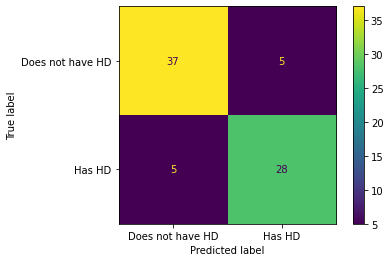

In [86]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      display_labels=["Does not have HD", "Has HD"]);

In the confusion matrix, we see that of the **37 + 5 = 42** people that did not have **Heart Disease**, **37 (88%)** were correctly classified. And of the **5 + 28 = 33** people that have **Heart Disease**, **28 (85%)** were correctly classified. So the support vector machine did pretty well without any optimization. That said, it is possible that we can improve predictions using **Cross Validation** to optimize the parameters.

## Optimize Support Vector Machine with Cross Valisation

Optimizing a Support Vector Machine is all about finding the best value for gamma, and, potentially, the regularization parameter, C.

In [88]:
param_grid = [
              {'C': [ 1, 10, 100, 1000],
               'gamma': [0.001, 0.0001],
               'kernel': ['rbf']}
]

optimal_params = GridSearchCV(
    SVC(),
    param_grid,
    cv=5,
    verbose=0
)

optimal_params.fit(X_train_scaled, y_train)
optimal_params.best_params_

{'C': 10, 'gamma': 0.001, 'kernel': 'rbf'}

## Building, Evaluating, Drawing and Interpreting the Support Vector Machine

In [91]:
clf_svm = SVC(C=10, gamma=0.001)
clf_svm.fit(X_train_scaled, y_train)

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

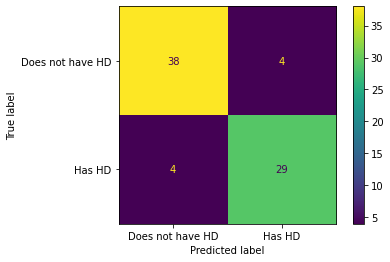

In [94]:
plot_confusion_matrix(clf_svm,
                      X_test_scaled,
                      y_test,
                      display_labels=["Does not have HD", "Has HD"]);

Of the **38 + 4 = 42** people that did not have heart disease, **38 (90%)** were correctly classified. This is an improvement over the preliminary support vector machine, which only correctly classified **37 (88%)** of the patients without heart disease. Of the **4 + 29 = 33** people with heart disease, **29 (87%)** were correctly classified. This is also an improvement over the preliminary support vector machine, which only correctly classified **28 (85%)** of the patients with heart disease.

## PCA

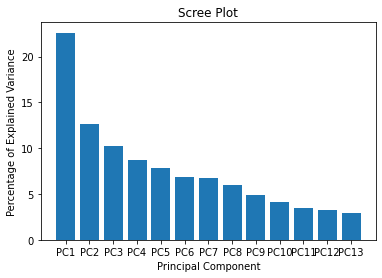

In [98]:
pca = PCA() # By default, PCA() centers the data, but does not scale it.
X_train_pca = pca.fit_transform(X_train_scaled)

per_var = np.round(pca.explained_variance_ratio_* 100, decimals=1)
labels = ['PC' + str(x) for x in range(1, len(per_var)+1)]
 
plt.bar(x=range(1,len(per_var)+1), height=per_var, tick_label=labels)
plt.ylabel('Percentage of Explained Variance')
plt.xlabel('Principal Component')
plt.title('Scree Plot')
plt.show();

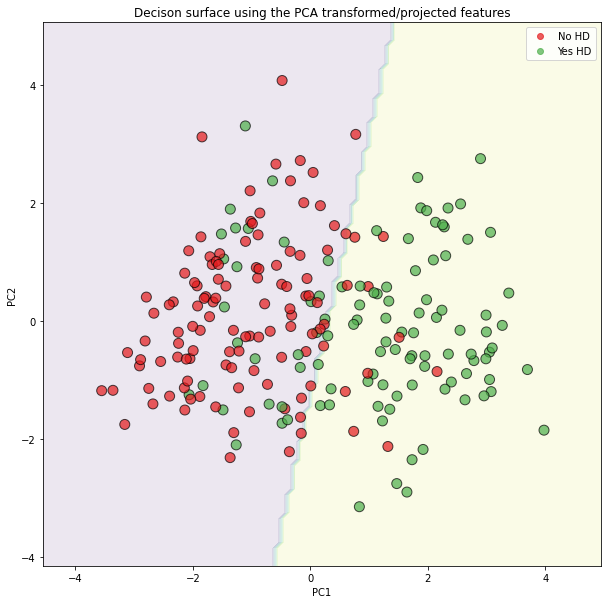

In [99]:
pc1 = X_train_pca[:, 0] 
pc2 = X_train_pca[:, 1]

## NOTE:
## pc1 contains the x-axis coordinates of the data after PCA
## pc2 contains the y-axis coordinates of the data after PCA

## Now we fittthe SVM to the x and y-axis coordinates
## of the data after PCA dimension reduction...
clf_svm.fit(np.column_stack((pc1, pc2)), y_train)

## Now create a matrix of points that we can use to show
## the decision regions.
## The matrix will be a little bit larger than the
## transformed PCA points so that we can plot all of
## the PCA points on it without them being on the edge
x_min = pc1.min() - 1
x_max = pc1.max() + 1

y_min = pc2.min() - 1
y_max = pc2.max() + 1

xx, yy = np.meshgrid(np.arange(start=x_min, stop=x_max, step=0.1),
                     np.arange(start=y_min, stop=y_max, step=0.1))

## now we will classify every point in that 
## matrix with the SVM. Points on one side of the 
## classification boundary will get 0, and points on the other
## side will get 1.
Z = clf_svm.predict(np.column_stack((xx.ravel(), yy.ravel())))
## Right now, Z is just a long array of lots of 0s and 1s, which
## reflect how each point in the mesh was classified.
## We use reshape() so that each classification (0 or 1) corresponds
## to a specific point in the matrix.
Z = Z.reshape(xx.shape)

fig, ax = plt.subplots(figsize=(10,10))
## now we will use contourf() to draw a filled contour plot
## using the matrix values and classifications. 
## The contours will be filled according to the 
## predicted classifications (0s and 1s) in Z
ax.contourf(xx, yy, Z, alpha=0.1)

## now create custom colors for the actual data points
cmap = colors.ListedColormap(['#e41a1c', '#4daf4a'])
## now darw the actual data points - these will
## be colored by their known (not predcited) classifications
## NOTE: setting alpha=0.7 lets us see if we are covering up a point 
scatter = ax.scatter(pc1, pc2, c=y_train, 
               cmap=cmap, 
               s=100, 
               edgecolors='k', ## 'k' = black
               alpha=0.7)

## now create a legend
legend = ax.legend(scatter.legend_elements()[0], 
                   scatter.legend_elements()[1],
                    loc="upper right")
legend.get_texts()[0].set_text("No HD")
legend.get_texts()[1].set_text("Yes HD")

## now add axis labels and titles
ax.set_ylabel('PC2')
ax.set_xlabel('PC1')
ax.set_title('Decison surface using the PCA transformed/projected features')
# plt.savefig('svm.png')
plt.show()

# Another Example

## Data

### Social Network Ads
A categorical dataset to determine whether a user purchased a particular product

https://www.kaggle.com/rakeshrau/social-network-ads

In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [101]:
dataset = pd.read_csv("https://raw.githubusercontent.com/otwn/Data-Science-Review/master/data/Social_Network_Ads.csv")

In [102]:
dataset.head()

User ID  Gender  Age  EstimatedSalary  Purchased
0  15624510    Male   19            19000          0
1  15810944    Male   35            20000          0
2  15668575  Female   26            43000          0
3  15603246  Female   27            57000          0
4  15804002    Male   19            76000          0

In [103]:
X = dataset.iloc[:, [2,3]].values
y = dataset.iloc[:, 4].values

In [105]:
print(X[0:5])

[[   19 19000]
 [   35 20000]
 [   26 43000]
 [   27 57000]
 [   19 76000]]


In [106]:
print(y[0:5])

[0 0 0 0 0]


## Spliting the datset into the training set & testing set

In [107]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [112]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [114]:
X_test[0:5]

array([[ 2.12240554,  0.23278499],
       [-1.10707609,  0.13841269],
       [-0.22630837,  0.39007214],
       [ 1.43736398,  2.34043283],
       [-0.22630837, -0.80531022]])

## Fit our SVM classifier to our training data

In [115]:
from sklearn.svm import SVC

svm_clf = SVC(kernel='linear')
svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

## Create Confusion Matrics

In [119]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[47,  5],
       [ 9, 19]])

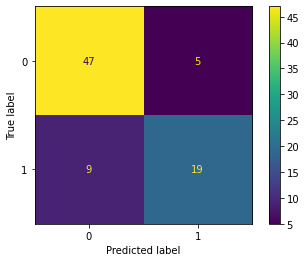

In [122]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(svm_clf,
                      X_test,
                      y_test);